## Q1

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/communities.data', header = None)
num_row, num_col = data.shape

# preprocessing this data set with missing values
selected_column = []
for j in range(num_col - 1):
    valcount = data.iloc[:, j].value_counts()
    if '?' not in valcount:
        selected_column.append(j)
    elif valcount['?'] < 0.01 * num_row:
        valmean = pd.to_numeric(data.iloc[:, j], errors = 'coerce').mean()
        for i in range(num_row):
            if data.iloc[i, j] == '?':
                data.iloc[i, j] = valmean
        data.iloc[:, j] = pd.to_numeric(data.iloc[:, j])
        selected_column.append(j)
print('num of selected columns:', len(selected_column))

num of selected columns: 103


In [3]:
np.random.seed(2018)
train = np.random.choice([True, False], num_row, replace = True, p = [0.9, 0.1])
x_train = data.iloc[train, selected_column].as_matrix()
y_train = data.iloc[train, -1].as_matrix()
x_test = data.iloc[~ train, selected_column].as_matrix()
y_test = data.iloc[~ train, -1].as_matrix()

alpha = [0.001, 0.01, 0.1, 1]

In [4]:
# linear regression
from sklearn import linear_model # The sklearn.linear_model module implements generalized linear models.
from sklearn import metrics
# regr = linear_model.LinearRegression() # initialize a linear regression model
# regr.fit(x_train, y_train)

selected_column2 = selected_column.copy()
for i in selected_column:
    if data[i].dtype != np.float64:
        selected_column2.remove(i)

print('columns selected for building linear model:', '\n', selected_column2)
x_train_linear = data.iloc[train, selected_column2].as_matrix()
x_test_linear = data.iloc[~ train, selected_column2].as_matrix()

regr = linear_model.LinearRegression()
regr.fit(x_train_linear, y_train)
linear_test = regr.predict(x_test_linear)
mse = metrics.mean_squared_error(y_test, linear_test)
print('MSE on linear model:', mse)

columns selected for building linear model: 
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 118, 119, 120, 125]
MSE on linear model: 0.0200998887358


In [5]:
# build lasso here
import numpy as np
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

mse = []
cplxy = []
cost = []

for i in range(len(alpha)):
    lasso = linear_model.Lasso(alpha = alpha[i])
    lasso.fit(x_train_linear, y_train)
    y_lasso_pred = lasso.predict(x_test_linear)
    mse.append(metrics.mean_squared_error(y_test, y_lasso_pred))
    cplxy.append(sum(abs(lasso.coef_)))
    cost.append(mse[i] + alpha[i] * cplxy[i])

from prettytable import PrettyTable

x = PrettyTable(["Lasso", "Alpha = 0.001", "Alpha = 0.01", "Alpha = 0.1", "Alpha = 1"])
x.align["Lasso"] = "l" 
x.padding_width = 1 
x.add_row(["MSE on test data",mse[0], mse[1], mse[2], mse[3]])
x.add_row(["model complexity", cplxy[0], cplxy[1], cplxy[2], cplxy[3]])
x.add_row(["regularized cost", cost[0], cost[1], cost[2], cost[3]])
print(x)

best_lasso_alpha = alpha[cost.index(min(cost))]

print("alpha of the best Lasso: ", best_lasso_alpha)

+------------------+-----------------+-----------------+-----------------+-----------------+
| Lasso            |  Alpha = 0.001  |   Alpha = 0.01  |   Alpha = 0.1   |    Alpha = 1    |
+------------------+-----------------+-----------------+-----------------+-----------------+
| MSE on test data | 0.0188754520516 | 0.0235252914205 | 0.0538976187541 | 0.0538976187541 |
| model complexity |  1.34367735043  |  0.634750244879 |       0.0       |       0.0       |
| regularized cost | 0.0202191294021 | 0.0298727938693 | 0.0538976187541 | 0.0538976187541 |
+------------------+-----------------+-----------------+-----------------+-----------------+
alpha of the best Lasso:  0.001


In [6]:
# build ridge here
import numpy as np
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

mse = []
cplxy = []
cost = []

for i in range(len(alpha)):
    r_regr = linear_model.Ridge(alpha=alpha[i])
    r_regr.fit(x_train_linear, y_train)
    y_ridge_pred = r_regr.predict(x_test_linear)
    mse.append(metrics.mean_squared_error(y_test, y_ridge_pred))
    cplxy.append(sum(abs(r_regr.coef_)))
    cost.append(mse[i] + alpha[i] * cplxy[i])
    
from prettytable import PrettyTable

x = PrettyTable(["Ridge", "Alpha = 0.001", "Alpha = 0.01", "Alpha = 0.1", "Alpha = 1"])
x.align["Ridge"] = "l" 
x.padding_width = 1 
x.add_row(["MSE on test data",mse[0], mse[1], mse[2], mse[3]])
x.add_row(["model complexity", cplxy[0], cplxy[1], cplxy[2], cplxy[3]])
x.add_row(["regularized cost", cost[0], cost[1], cost[2], cost[3]])
print(x)

best_ridge_alpha = alpha[cost.index(min(cost))]

print("alpha of the best Ridge: ", best_ridge_alpha)

+------------------+-----------------+-----------------+-----------------+-----------------+
| Ridge            |  Alpha = 0.001  |   Alpha = 0.01  |   Alpha = 0.1   |    Alpha = 1    |
+------------------+-----------------+-----------------+-----------------+-----------------+
| MSE on test data | 0.0200960898758 | 0.0200655017473 | 0.0198692286267 | 0.0192737067576 |
| model complexity |  13.5903167744  |  12.9950404407  |   10.415416628  |  6.48687831762  |
| regularized cost | 0.0336864066502 |  0.150015906154 |  1.06141089143  |  6.50615202437  |
+------------------+-----------------+-----------------+-----------------+-----------------+
alpha of the best Ridge:  0.001


# Q1.2
The basic idea is to get pairwise combinations of variables, and use those combinations as input to fit a model.
Based on the R-squared to select the two most important variable, because the number of input variables is exactly 2, there is no need to calculate the adjusted R-squared.

In [7]:
# Q1.2
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import combinations
from sklearn import linear_model, metrics


row_idx, col_idx = x_train_linear.shape
r_squared_matrix = np.zeros((int(comb(col_idx, 2)), 5))
comb_var = list(combinations(range(col_idx), 2))
# print(comb_var)

lin_regr = linear_model.LinearRegression()
las_regr = linear_model.Lasso(alpha = best_lasso_alpha)
rid_regr = linear_model.Ridge(alpha = best_ridge_alpha)

for element in range(len(comb_var)):
    i, j = comb_var[element]
    r_squared_matrix[element, 0] = i
    r_squared_matrix[element, 1] = j
    lin_regr.fit(x_train_linear[:,[i,j]], y_train)
    lin_test = lin_regr.predict(x_test_linear[:,[i,j]])
    r_squared_matrix[element, 2] = metrics.r2_score(y_test,lin_test)
    las_regr.fit(x_train_linear[:,[i,j]], y_train)
    las_test = las_regr.predict(x_test_linear[:,[i,j]])
    r_squared_matrix[element, 3] = metrics.r2_score(y_test,las_test)
    rid_regr.fit(x_train_linear[:,[i,j]], y_train)
    rid_test = rid_regr.predict(x_test_linear[:,[i,j]])
    r_squared_matrix[element, 4] = metrics.r2_score(y_test,rid_test)
    
important_var_idx = np.where(r_squared_matrix[:, 2:5]==np.max(r_squared_matrix[:, 2:5],axis=0))[0]

regression_name = ['linear regression', 'lasso regression', 'ridge regression']
for i in range(len(important_var_idx)):
    col0, col1 = r_squared_matrix[important_var_idx[i], 0:2]
    print(("important variable name for %s" % regression_name[i]), 
          selected_column2[int(col0)], selected_column2[int(col1)], 
          "column index is ", int(col0), int(col1))


important variable name for linear regression 46 55 column index is  41 50
important variable name for lasso regression 46 55 column index is  41 50
important variable name for ridge regression 46 55 column index is  41 50


In [8]:
regression_name = ['linear regression', 'lasso regression', 'ridge regression']
for i in range(len(important_var_idx)):
    col0, col1 = r_squared_matrix[important_var_idx[i], 0:2]
    print(("important variable name for %s" % regression_name[i]), 
          selected_column2[int(col0)], selected_column2[int(col1)], 
          "column index is ", int(col0), int(col1))


important variable name for linear regression 46 55 column index is  41 50
important variable name for lasso regression 46 55 column index is  41 50
important variable name for ridge regression 46 55 column index is  41 50


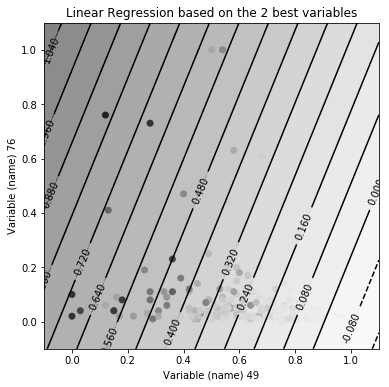

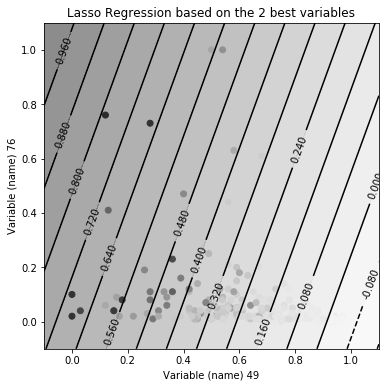

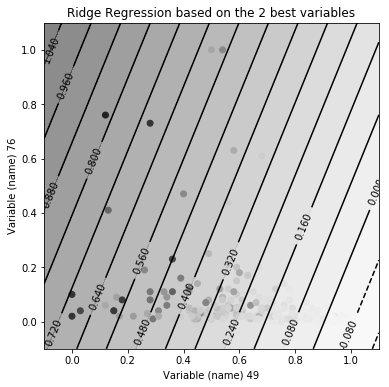

In [9]:
col0 = 44
col1 = 71

x_train2 = x_train_linear[:, [col0, col1]]
x_test2 = x_test_linear[:, [col0, col1]]

lin_regr.fit(x_train_linear[:, [col0, col1]], y_train)
lin_pred = lin_regr.predict(x_test_linear[:, [col0, col1]])

las_regr.fit(x_train_linear[:, [col0, col1]], y_train)
las_pred = las_regr.predict(x_test_linear[:, [col0, col1]])

rid_regr.fit(x_train_linear[:, [col0, col1]], y_train)
rid_pred = rid_regr.predict(x_test_linear[:, [col0, col1]])

def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x0 = my_linspace(min(x_train2[:, 0]), max(x_train2[:, 0]), steps)
x1 = my_linspace(min(x_train2[:, 1]), max(x_train2[:, 1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]


for i in regression_name:
    plt.figure(figsize=(6, 6))
    plt.scatter(x_test2[:, 0], x_test2[:, 1], c=y_test, cmap = 'Greys')
    if i == 'linear regression':
        mesh_pred = lin_regr.predict(mesh_data).reshape(steps, steps)
        plt.title("Linear Regression based on the 2 best variables")
    if i == 'lasso regression':
        mesh_pred = las_regr.predict(mesh_data).reshape(steps, steps)
        plt.title("Lasso Regression based on the 2 best variables")
    if i == 'ridge regression':
        mesh_pred = rid_regr.predict(mesh_data).reshape(steps, steps)
        plt.title("Ridge Regression based on the 2 best variables")
    plt.contourf(xx0, xx1, mesh_pred, 15, cmap='Greys', alpha=0.5)
    C = plt.contour(xx0,xx1, mesh_pred, 15, colors='black')
    plt.clabel(C, inline = True, fontsize = 10)
    plt.xlabel("Variable (name) %d" % selected_column2[int(col0)])
    plt.ylabel("Variable (name) %d" % selected_column2[int(col1)])
    plt.show()
